## Simple uncoated lens
This examples illustrates how to create a simple optical system consisting of a source, an uncoated lens and a detector. Two sources are created : one for ray analysis and one for ray display. The system and spot diagram are displayed. Mueller matrix is computed. As this an axially symmetric system, Mueller matrix for the on axis field would be an identity matrix.


In [1]:
# %matplotlib inline
# %matplotlib tk
# %matplotlib qt5
import numpy as np
import sys
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd
import copy as cp
from datetime import datetime as dt
#
sys.path.append('..')
import PyAstroPol as pap
pap.roundOffDisplay(5)

In [2]:
Source_analysis = pap.Source(10000, Clear=40)                       # Source for ray analysis
Source_analysis.translateOrigin(z=-100)                         # Adjust source position
#
Source_display = pap.Source(20, Clear=40)                           # Source for ray display
Source_display.translateOrigin(z=-100)                          # Adjust source (display) position
#
Lens_1 = pap.UncoatedLens(50, 10, R1=200, R2=-200, n='N-BK7')       # Lens
#
Detector_1 = pap.Detector(20)                                       # Detector
Detector_1.translateOrigin(z=200.3)                             # Adjust detector position

In [3]:
Sys = pap.System(Source_analysis, [Lens_1], 
             Detector_1, dRays=Source_display)                          # Complete optical system
Sys.propagateRays()                                                     # Propagate rays through system

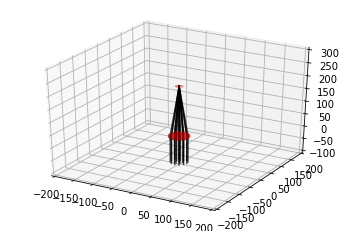

In [5]:
Fig = plt.figure()                                             
Ax = Fig.add_subplot(111, projection='3d')
Sys.draw(Ax)                                                       # Draw optical system
pap.adjustAspect(Ax, 400, z=100)                                       # Adjust 3D space
plt.show()

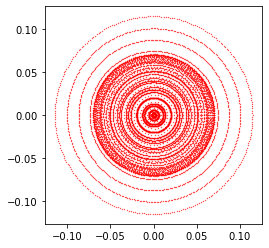

In [6]:
Fig = plt.figure()
Ax = Fig.add_subplot(111, aspect='equal')                       
Sys.drawSpotDiagram(Ax, s=0.1, color='r')                   # Draw spot diagram
plt.show()

In [7]:
MM, Tra = Sys.getSystemMuellerMatrix()                      # Optical system's Mueller matrix
print('System Mueller matrix is : \n', MM)
print('Throughput is: ', Tra)

System Mueller matrix is : 
 [[ 1.00000 -0.00000  0.00000  0.00000]
 [-0.00000  1.00000  0.00000  0.00000]
 [ 0.00000 -0.00000  1.00000 -0.00000]
 [-0.00000  0.00000  0.00000  1.00000]]
Throughput is:  0.9178644858642326
